In [6]:
import pandas as pd
import jieba
import jieba.posseg as pseg  # 导入词性标注模块
from collections import Counter
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# 读取Excel文件
file_path = 'Blossoms_DouBan_Review.xlsx'
df = pd.read_excel(file_path)





['国产', '的琅', '好剧', '代名词', '人为', '名声', '名声', '好戏', '跨度', '第一桶金', '第一桶金', '亏本', '情感', '经典', '理想', '典句', '大师', '老师', '感情', '东西', '人生', '感情', '东西', '朋友', '伙伴', '男女', '天时地利', '空门', '细说', '雪芝', '香港', '幻想', '幻想', '雪芝', '样子', '芝会', '物质', '爱情', '雪芝', '雪芝', '态度', '理由', '雪芝', '雪芝', '地步', '男女', '单位', '性质', '集体', '工厂', '机修工', '全民', '单位', '售票员', '爸爸', '集体', '小厂', '机修工', '反革命', '子女', '雪芝', '雪芝', '大大方方', '工人', '新村', '哥哥', '垃圾', '地角', '垃圾', '爸爸', '雪芝', '陋室', '天气', '房间', '邮票', '民国', '雪芝', '腊梅', '枝桠', '笔墨', '落雪', '精神', '寒花', '初雪', '玻璃', '哈气', '雪芝', '雪气', '天生天化', '桃三', '腊梅', '寒花', '单枝', '数房', '棋子', '雪芝', '雪芝', '对子', '频昼', '香花', '雪芝', '窗玻璃', '雪芝', '心慧', '小时', '雪芝', '精神', '物质', '雪芝', '普普通通', '售票员', '精神', '世界', '水准', '对话', '邮票', '字帖', '雪芝', '雪芝', '小时', '雪芝', '无人', '雪芝', '思南路', '雪芝', '精神', '底蕴', '原著', '母亲', '势利眼', '父兄', '白眼', '方面', '条件', '雪芝', '爱情', '莫大', '信心', '现实', '雪芝', '亲戚', '香港', '雪芝', '情愿', '买票', '伤心', '事实', '雪芝', '雪芝', '雪芝', '蒸汽', '香港', '酒店', '服务员', '雪芝', '错失', '东西', '雪芝', '面子', '假装', '雪芝', '雪芝', '物质',

In [9]:
# 添加自定义词汇
custom_words = ['和平饭店', '至真园', '泡饭', '排骨年糕', '蓝鱼秃肺拼海参', '红烧划水', '定胜糕', '油墩子', '川沙鸡爪', 
                '牛河', '黄鱼面', '饭团', '鹤针', '舟王炒饭', '炎王蛇', '三文鱼', '鲶鱼', '茶叶蛋', '火锅', '辣肉面', '包子']
for word in custom_words:
    jieba.add_word(word)

# 获取评论内容列，并将其转换为字符串类型
comments = df['内容'].astype(str)

# 文本预处理：分词并进行词性标注，去除人名和组织名，但保留地名
filtered_words = []
for comment in comments:
    words = pseg.cut(comment)  # 使用 jieba 进行分词并标注词性
    for word, flag in words:
        # 如果是自定义词汇，无论其词性标注是什么，都保留
        if word in custom_words:
            filtered_words.append(word)
        # 其他情况只保留普通名词、专有名词、名词性惯用语、地名
        elif flag in ('n', 'nz', 'ng', 'ns'):  
            filtered_words.append(word)


# 读取扩展停用词库文件
with open('cn_stopwords.txt', 'r', encoding='utf-8') as f:
    file_stop_words = set(f.read().splitlines())

# 定义并扩展停用词库，包括与影视相关的词语
custom_stop_words = set([
    '的', '了', '和', '是', '我', '也', '在', '有', '就', '不', '人', '都', '这个', '上', '很', '你', '他', '她',
    '它', '我们', '他们', '她们', '自己', '所以', '因为', '这样', '这里', '那里', '什么', '但是', '如果', '那么', '有点',
    '还是', '虽然', '不过', '而且', '并且', '关于', '其中', '甚至', '一些', '还有', '或者', '所以', '其实', '另外', '其实',
    '以及', '就是', '与', '就', '最', '已经', '非常', '那么', '而', '并', '还', '其中', '所有', '所有的', '还有', '只是',
    '几乎', '其他', '而且', '但', '呢', '却', '哇', '哈', '吧', '啊', '的', '嘞', '啦', '吗', '呀',
    '剧名', '作者', '人物', '故事', '剧情', '电影', '导演', '演员', '编剧', '观众', '影视', '小说', '雪芝', '原著', '作品', '画面', '感觉',
    '影片', '电视', '剧集', '电视剧', '台词', '镜头', '角色', '导演', '男主', '女主', '男人', '女人', '男性', '女性', '主角', '繁花', '版权', '剧中', '关系', '先生', '爷叔', '形式'
])

# 将自定义停用词和文件中的停用词合并
stop_words = custom_stop_words.union(file_stop_words)

# 过滤停用词和长度小于2的词语
filtered_words = [word for word in filtered_words if word not in stop_words and len(word) > 1]

# 检查过滤后的词语列表
print(filtered_words[:200])  # 打印前200个词，查看过滤效果

# 统计词频
word_freq = Counter(filtered_words)
common_words = word_freq.most_common(30)
print(common_words)


['国产', '的琅', '好剧', '代名词', '人为', '名声', '名声', '好戏', '跨度', '第一桶金', '第一桶金', '亏本', '情感', '经典', '理想', '典句', '大师', '老师', '感情', '东西', '人生', '感情', '东西', '朋友', '伙伴', '男女', '天时地利', '空门', '细说', '香港', '幻想', '幻想', '样子', '芝会', '物质', '爱情', '态度', '理由', '地步', '男女', '单位', '性质', '集体', '工厂', '机修工', '全民', '单位', '售票员', '爸爸', '集体', '小厂', '机修工', '反革命', '子女', '大大方方', '工人', '新村', '哥哥', '垃圾', '地角', '垃圾', '爸爸', '陋室', '天气', '房间', '邮票', '民国', '腊梅', '枝桠', '笔墨', '落雪', '精神', '寒花', '初雪', '玻璃', '哈气', '雪气', '天生天化', '桃三', '腊梅', '寒花', '单枝', '数房', '棋子', '对子', '频昼', '香花', '窗玻璃', '心慧', '小时', '精神', '物质', '普普通通', '售票员', '精神', '世界', '水准', '对话', '邮票', '字帖', '小时', '无人', '思南路', '精神', '底蕴', '母亲', '势利眼', '父兄', '白眼', '方面', '条件', '爱情', '莫大', '信心', '现实', '亲戚', '香港', '情愿', '买票', '伤心', '事实', '蒸汽', '香港', '酒店', '服务员', '错失', '东西', '面子', '假装', '物质', '香港', '顶级', '酒店', '服务员', '上海', '老百姓', '卖票', '真话', '香港', '角度', '上海', '临帖', '文艺', '香港', '内地', '打工妹', '东西', '精神', '上海', '香港', '困境', '作家', '香港', '理想', '稻粱', '专门', '上海', '无法', '对话', '香港', '服饰', '公司', '品

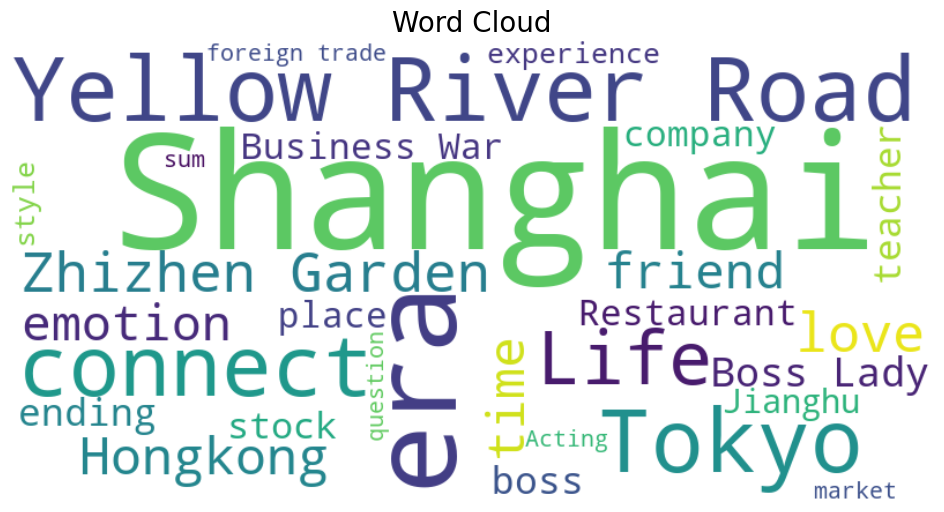

In [12]:
# 使用 deep_translator 仅对高频词进行翻译
translator = GoogleTranslator(source='zh-CN', target='en')
translated_words = {translator.translate(word): freq for word, freq in common_words}

# 生成词云，使用默认字体生成英文词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(translated_words)

# # 显示词云图
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


# 显示词云图，并添加标题和注释
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 隐藏轴
plt.title('Word Cloud', fontsize=20)  # 添加标题，设置字体大小

plt.savefig('wordcloud.png', format='png', bbox_inches='tight')

plt.show()


In [5]:
# 添加在你原来代码的末尾

# 统计自定义词汇的出现次数
custom_word_counts = {word: filtered_words.count(word) for word in custom_words}

# 打印每个自定义词汇的出现次数
for word, count in custom_word_counts.items():
    print(f"{word}: {count} 次")


和平饭店: 388 次
至真园: 947 次
泡饭: 249 次
排骨年糕: 328 次
蓝鱼秃肺拼海参: 0 次
红烧划水: 4 次
定胜糕: 4 次
油墩子: 1 次
川沙鸡爪: 3 次
牛河: 89 次
黄鱼面: 12 次
饭团: 9 次
鹤针: 0 次
舟王炒饭: 0 次
炎王蛇: 0 次
三文鱼: 18 次
鲶鱼: 46 次
茶叶蛋: 124 次
火锅: 62 次
辣肉面: 4 次
包子: 2 次
